<a href="https://colab.research.google.com/github/KimJisanER/Dacon/blob/main/1_1_penguin_MassRegre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


path='/content/drive/MyDrive/penguin/'

train=pd.read_csv(path+'train_2.csv')
test=pd.read_csv(path+'test_2.csv')

print(train.head().T)
print(test.head().T)

                                                     0  ...                                  4
id                                                   0  ...                                  4
Species              Gentoo penguin (Pygoscelis papua)  ...  Gentoo penguin (Pygoscelis papua)
Island                                          Biscoe  ...                             Biscoe
Clutch Completion                                  Yes  ...                                 No
Culmen Length (mm)                                  50  ...                               49.6
Culmen Depth (mm)                                 15.3  ...                                 16
Flipper Length (mm)                                220  ...                                225
Sex                                               MALE  ...                               MALE
Delta 15 N (o/oo)                              8.30515  ...                            8.38324
Delta 13 C (o/oo)                             -25.

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   114 non-null    int64  
 1   Species              114 non-null    object 
 2   Island               114 non-null    object 
 3   Clutch Completion    114 non-null    object 
 4   Culmen Length (mm)   114 non-null    float64
 5   Culmen Depth (mm)    114 non-null    float64
 6   Flipper Length (mm)  114 non-null    int64  
 7   Sex                  114 non-null    object 
 8   Delta 15 N (o/oo)    114 non-null    float64
 9   Delta 13 C (o/oo)    114 non-null    float64
 10  Body Mass (g)        114 non-null    int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 9.9+ KB


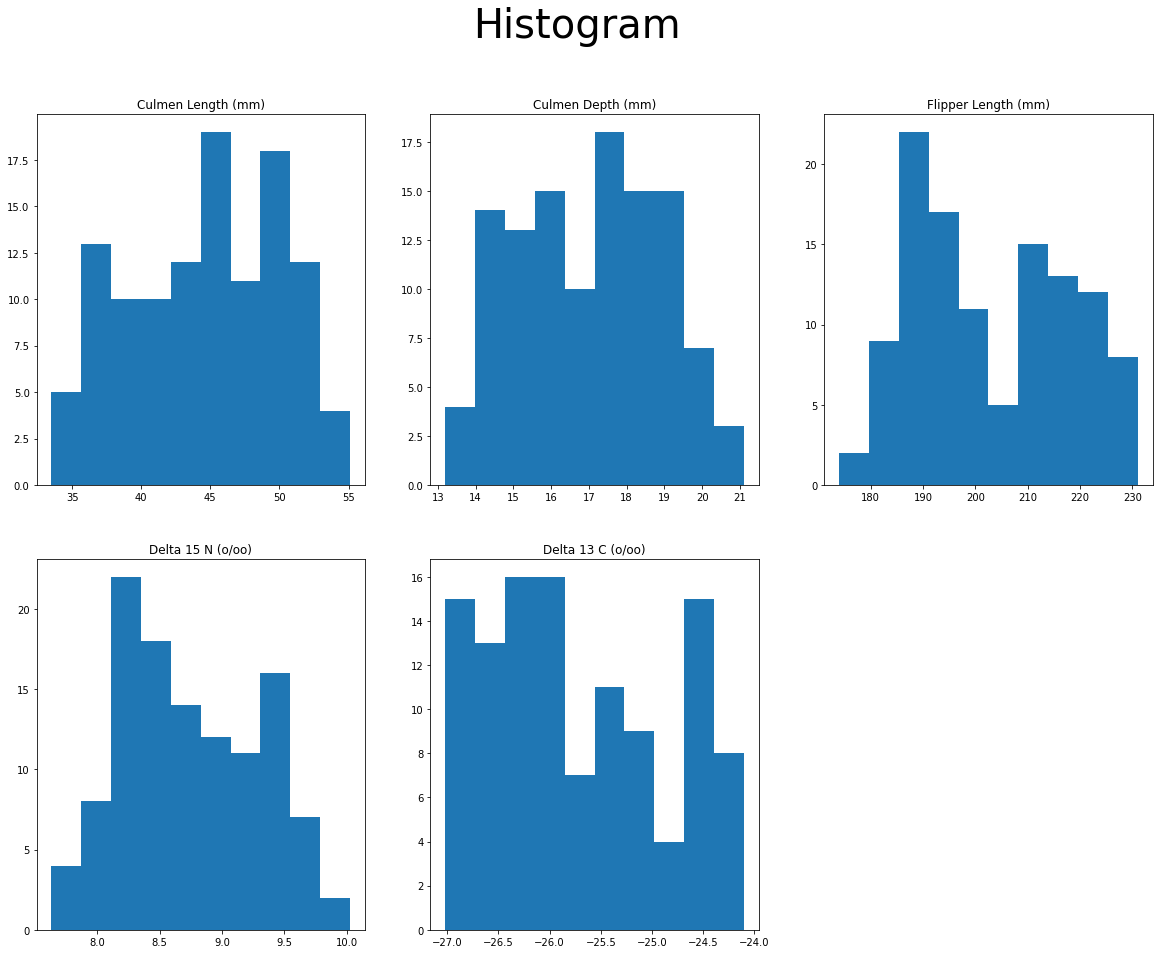

In [13]:
discrete_names = ['Species', 'Island', 'Clutch Completion', 'Sex']
continuous_names = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']

plt.figure(figsize=(20,15))
plt.suptitle("Histogram", fontsize=40)

for i in range(len(continuous_names)):
    plt.subplot(2,3,i+1)
    plt.title(continuous_names[i])
    plt.hist(train[continuous_names[i]])

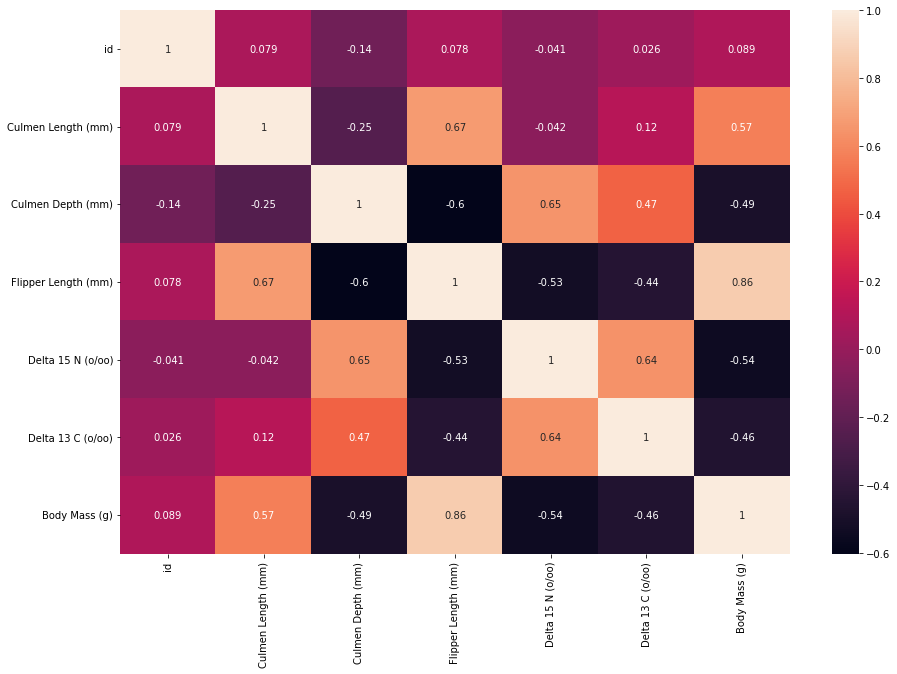

In [14]:
plt.figure(figsize=(15,10))
ax = sns.heatmap(train.corr(), annot=True)
plt.show()

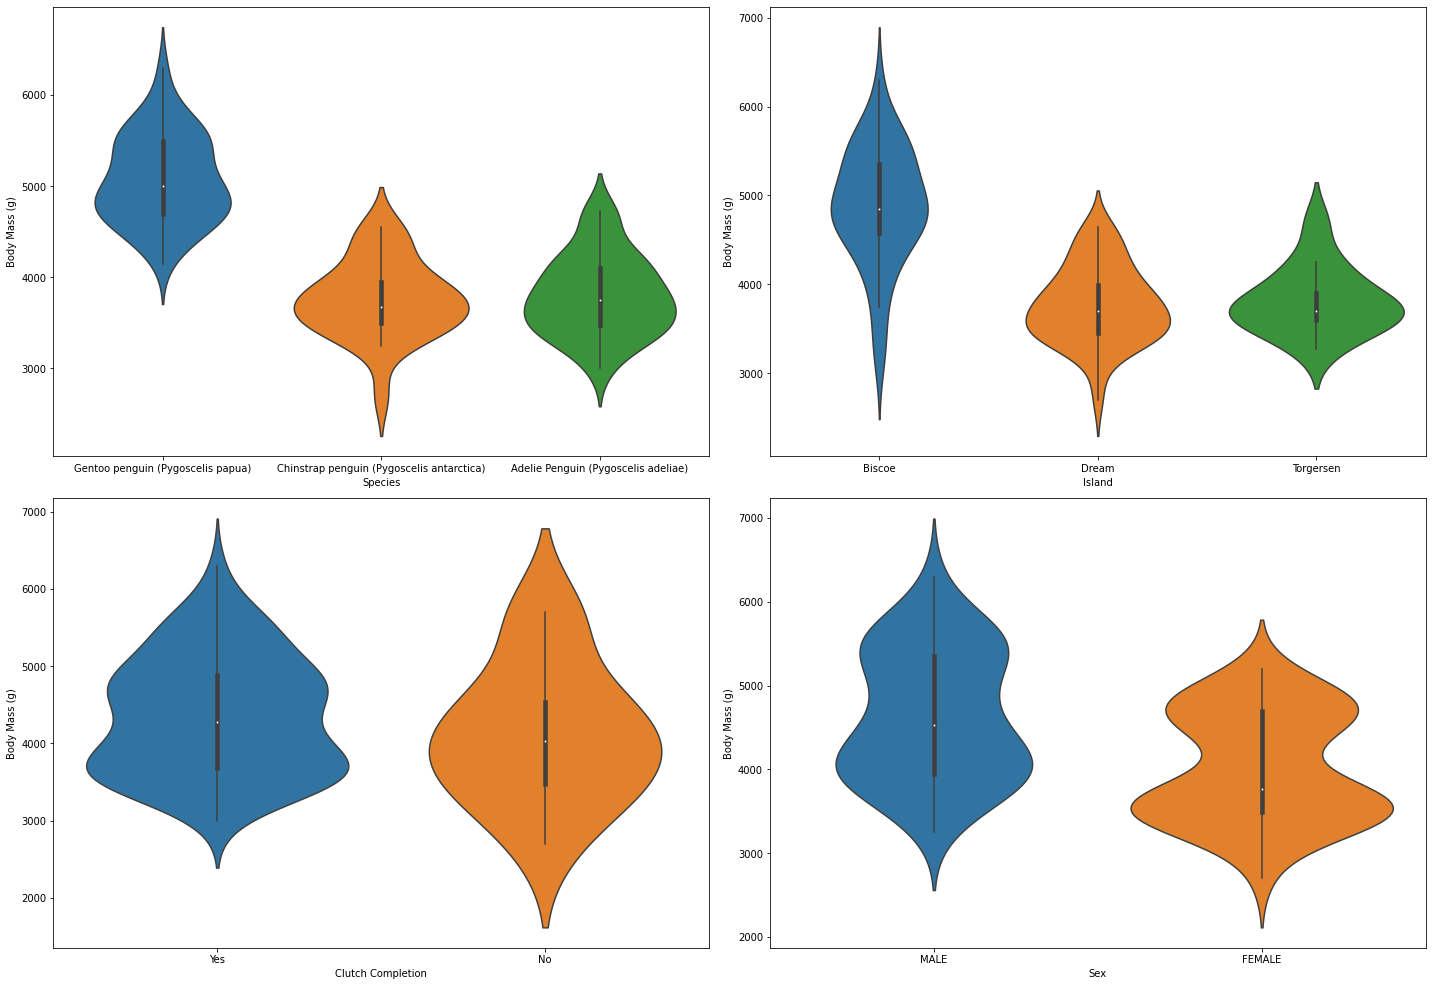

In [16]:
plt.figure(figsize=(20,15))

for i in range(len(discrete_names)):
    plt.subplot(2,2,i+1)
    plt.xlabel(discrete_names[i])
    plt.ylabel('Body Mass (g)')
    sns.violinplot(x= train[discrete_names[i]], y= train['Body Mass (g)'])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

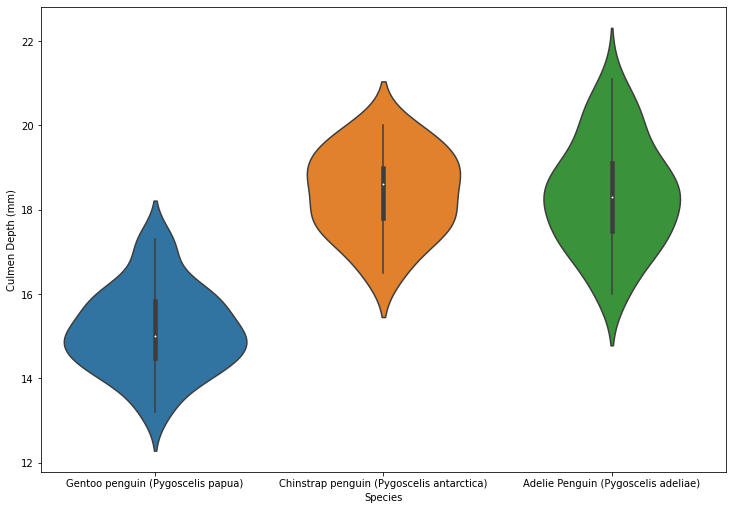

In [24]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,2)
plt.xlabel(discrete_names[i])
plt.ylabel('Culmen Depth (mm)')
sns.violinplot(x= train['Species'], y= train['Culmen Depth (mm)'])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

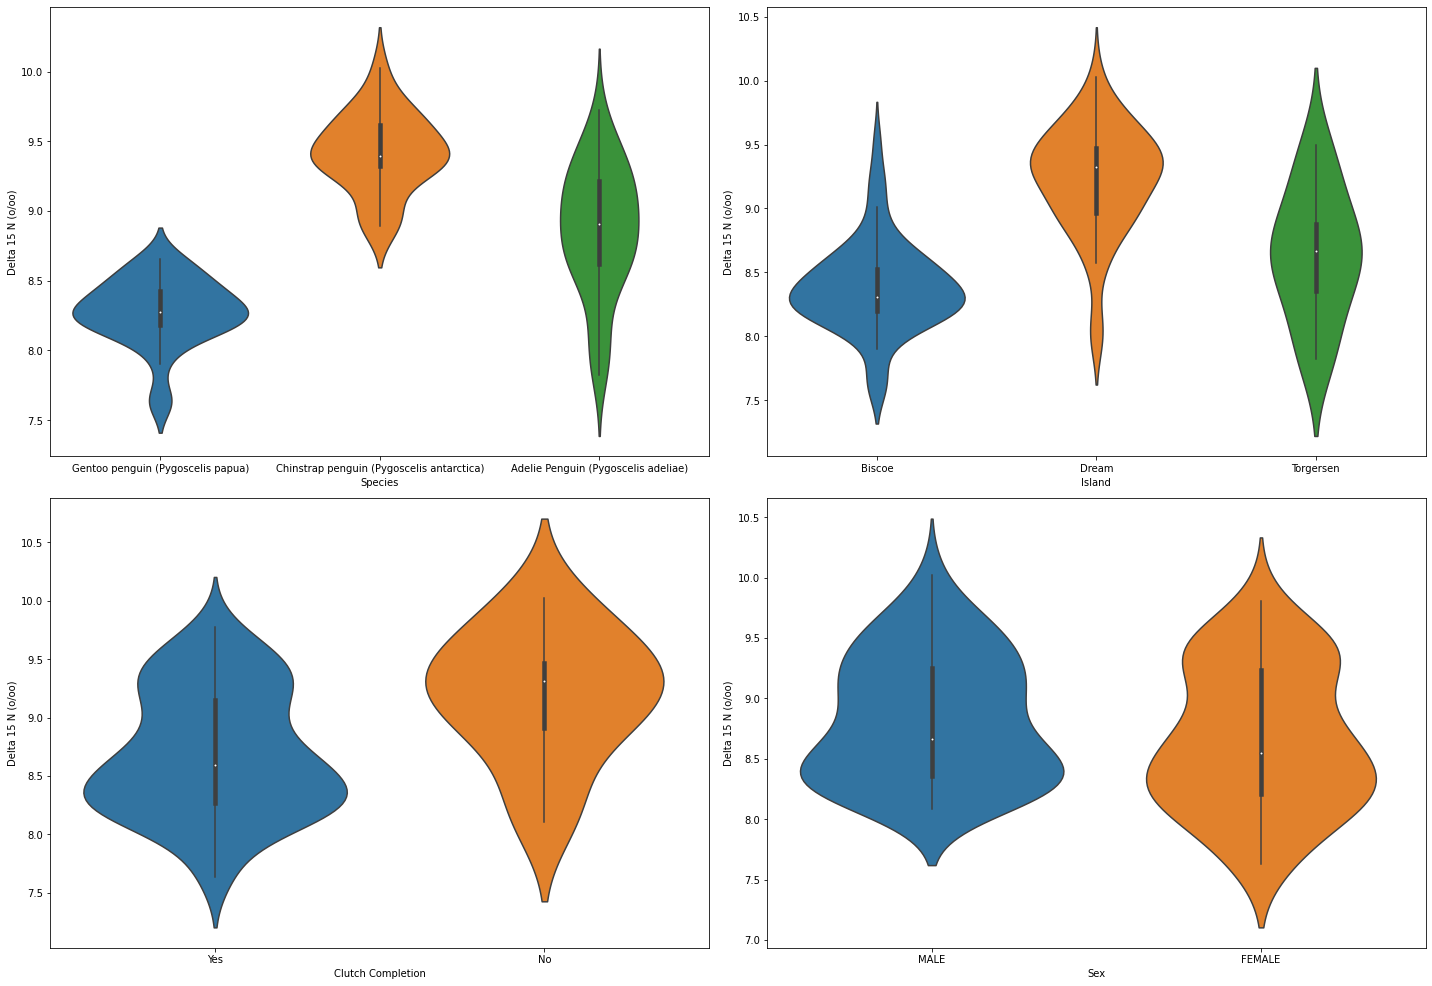

In [26]:
plt.figure(figsize=(20,15))

for i in range(len(discrete_names)):
    plt.subplot(2,2,i+1)
    plt.xlabel(discrete_names[i])
    plt.ylabel('Delta 15 N (o/oo)')
    sns.violinplot(x= train[discrete_names[i]], y= train['Delta 15 N (o/oo)'])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

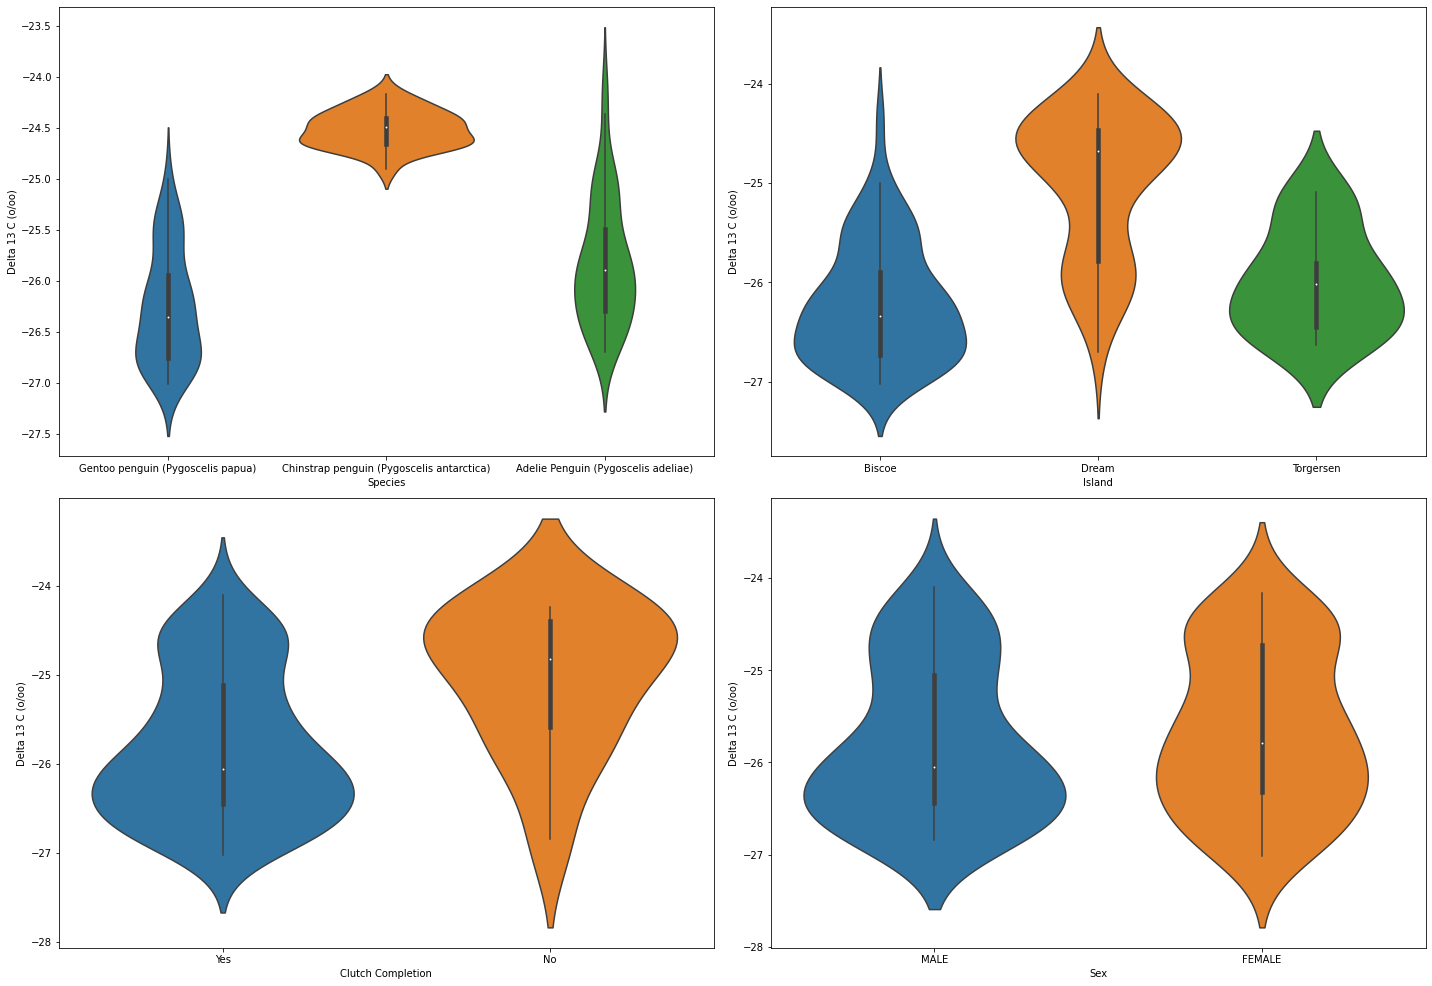

In [27]:
plt.figure(figsize=(20,15))

for i in range(len(discrete_names)):
    plt.subplot(2,2,i+1)
    plt.xlabel(discrete_names[i])
    plt.ylabel('Delta 13 C (o/oo)')
    sns.violinplot(x= train[discrete_names[i]], y= train['Delta 13 C (o/oo)'])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [39]:
print(train['Species'].value_counts())
print(test['Species'].value_counts())

Gentoo penguin (Pygoscelis papua)            48
Adelie Penguin (Pygoscelis adeliae)          41
Chinstrap penguin (Pygoscelis antarctica)    25
Name: Species, dtype: int64
Adelie Penguin (Pygoscelis adeliae)          110
Gentoo penguin (Pygoscelis papua)             75
Chinstrap penguin (Pygoscelis antarctica)     43
Name: Species, dtype: int64


In [64]:
train_1=train[train['Species']=='Gentoo penguin (Pygoscelis papua)']
X_train_1=train_1.iloc[:,1:10]
y_train_1=train_1.loc[:,'Body Mass (g)']

train_2=train[train['Species']=='Adelie Penguin (Pygoscelis adeliae)']
X_train_2=train_2.iloc[:,1:10]
y_train_2=train_2.loc[:,'Body Mass (g)']

train_3=train[train['Species']=='Chinstrap penguin (Pygoscelis antarctica)']
X_train_3=train_3.iloc[:,1:10]
y_train_3=train_3.loc[:,'Body Mass (g)']

test_1=test[test['Species']=='Gentoo penguin (Pygoscelis papua)']
test_id_1=test_1.iloc[:,0].dropna().reset_index(drop=True)
X_test_1=test_1.iloc[:,1:]

test_2=test[test['Species']=='Adelie Penguin (Pygoscelis adeliae)']
test_id_2=test_2.iloc[:,0].dropna().reset_index(drop=True)
X_test_2=test_2.iloc[:,1:]

test_3=test[test['Species']=='Chinstrap penguin (Pygoscelis antarctica)']
test_id_3=test_3.iloc[:,0].dropna().reset_index(drop=True)
X_test_3=test_3.iloc[:,1:]


In [65]:
label=[]

for i in X_train_1.columns:
  if X_train_1.dtypes[i] == 'object':
    label.append(i)

print(label)

from sklearn.preprocessing import LabelEncoder
X_train_1.loc[:,label]=X_train_1.loc[:,label].apply(LabelEncoder().fit_transform)
X_train_2.loc[:,label]=X_train_2.loc[:,label].apply(LabelEncoder().fit_transform)
X_train_3.loc[:,label]=X_train_3.loc[:,label].apply(LabelEncoder().fit_transform)
X_test_1.loc[:,label]=X_test_1.loc[:,label].apply(LabelEncoder().fit_transform)
X_test_2.loc[:,label]=X_test_2.loc[:,label].apply(LabelEncoder().fit_transform)
X_test_3.loc[:,label]=X_test_3.loc[:,label].apply(LabelEncoder().fit_transform)

['Species', 'Island', 'Clutch Completion', 'Sex']


In [66]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train_1)
X_train=scaler.transform(X_train_1)
X_test=scaler.transform(X_test_1)
#test도 쪼개줘야하나

from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(max_depth=5, n_estimators=200, min_samples_leaf=8, min_samples_split=8)
model.fit(X_train_1,y_train_1)

from sklearn.linear_model import Lasso
model_la=Lasso(alpha=0.2)
model_la.fit(X_train_1,y_train_1)

from sklearn.linear_model import LinearRegression
model_lr=LinearRegression()
model_lr.fit(X_train_1,y_train_1)

import xgboost as xgb
from xgboost import XGBRegressor
model_xgb=XGBRegressor(max_depth=2)
model_xgb.fit(X_train_1,y_train_1)

pred=model.predict(X_test_1)
pred2=model_la.predict(X_test_1)
pred3=model_lr.predict(X_test_1)
pred4=model_xgb.predict(X_test_1)

pred_gt=0.25*pred+0.25*pred2+0.25*pred3+0.25*pred4
pred_gt=pd.DataFrame(pred_gt)
pred_gt=pd.concat([test_id_1,pred_gt], axis=1, ignore_index=True)
print(pred_gt.head())

[09:50:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
    0            1
0   1  5619.806468
1   6  4549.562769
2   7  5067.892558
3   8  4768.017334
4  11  4775.377734


In [68]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train_2)
X_train=scaler.transform(X_train_2)
X_test=scaler.transform(X_test_2)
#test도 쪼개줘야하나

from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(max_depth=5, n_estimators=200, min_samples_leaf=8, min_samples_split=8)
model.fit(X_train_2,y_train_2)

from sklearn.linear_model import Lasso
model_la=Lasso(alpha=0.2)
model_la.fit(X_train_2,y_train_2)

from sklearn.linear_model import LinearRegression
model_lr=LinearRegression()
model_lr.fit(X_train_2,y_train_2)

import xgboost as xgb
from xgboost import XGBRegressor
model_xgb=XGBRegressor(max_depth=2)
model_xgb.fit(X_train_2,y_train_2)

pred=model.predict(X_test_2)
pred2=model_la.predict(X_test_2)
pred3=model_lr.predict(X_test_2)
pred4=model_xgb.predict(X_test_2)

pred_ch=0.25*pred+0.25*pred2+0.25*pred3+0.25*pred4
pred_ch=pd.DataFrame(pred_ch)
pred_ch=pd.concat([test_id_2,pred_ch], axis=1, ignore_index=True)
print(pred_ch.head())

[09:53:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
    0            1
0   2  3537.510121
1   4  3654.028061
2   9  4324.281036
3  10  4260.827763
4  17  4021.605828


In [69]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train_3)
X_train=scaler.transform(X_train_3)
X_test=scaler.transform(X_test_3)
#test도 쪼개줘야하나

from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(max_depth=5, n_estimators=200, min_samples_leaf=8, min_samples_split=8)
model.fit(X_train_3,y_train_3)

from sklearn.linear_model import Lasso
model_la=Lasso(alpha=0.2)
model_la.fit(X_train_3,y_train_3)

from sklearn.linear_model import LinearRegression
model_lr=LinearRegression()
model_lr.fit(X_train_3,y_train_3)

import xgboost as xgb
from xgboost import XGBRegressor
model_xgb=XGBRegressor(max_depth=2)
model_xgb.fit(X_train_3,y_train_3)

pred=model.predict(X_test_3)
pred2=model_la.predict(X_test_3)
pred3=model_lr.predict(X_test_3)
pred4=model_xgb.predict(X_test_3)

pred_ad=0.25*pred+0.25*pred2+0.25*pred3+0.25*pred4
pred_ad=pd.DataFrame(pred_ad)
pred_ad=pd.concat([test_id_3,pred_ad], axis=1, ignore_index=True)
print(pred_ad.head())

[09:56:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
    0            1
0   0  4325.805261
1   3  3500.225561
2   5  4301.806121
3  16  4152.669554
4  23  3933.116095


In [73]:
sub=pd.concat([pred_gt,pred_ch,pred_ad], axis=0)
sub.columns=['id','Body Mass (g)']
sub=sub.sort_values('id', ascending=True)
print(sub.head())
sub.to_csv('penguin_spe.csv', index=False)

   id  Body Mass (g)
0   0    4325.805261
0   1    5619.806468
0   2    3537.510121
1   3    3500.225561
1   4    3654.028061
